In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

## Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-9.112485291953348 -103.92363708521954
-11.890490362099726 104.45538099238843
-5.369184610406904 91.12061867756393
76.72046532078159 33.9918722501952
-31.574602853729573 86.57807585348144
41.18569022139059 159.3053064900301
-85.58391511070117 -136.48221560317947
6.098853628624283 -140.16040753748734
7.668046644463885 -90.40188597614896
24.050214448331772 -64.52189044439632
39.3087682137531 -58.758335330729224
60.10663072570131 74.67476319538261
-21.329473622665915 -102.13716227725061
-0.7071411370905452 -79.21871960808775
78.31947763107266 -106.50044893648266
-60.31520448604571 55.42375559591616
39.631958666329695 -94.89724855934698
72.44176882571088 -30.822614667089056
-10.861942149203657 -111.57152429595297
18.540234059739333 60.591279235038286
48.793621132870726 -84.0705492350099
-19.742250679719007 -25.72166920667891
82.2000398991602 140.07004208696907
-84.35716256417504 110.82859273213148
23.774957699364307 106.59206533117424
66.39117499985221 -25.444999370807977
-13.9714265455318

-84.8937529566404 26.770328139501203
-60.4680573057328 -166.04385465009344
-33.299297018689266 72.40562257136403
56.69208325377724 -153.25206570346845
-40.90747969681701 153.84077800447818
-54.26404808724244 72.57096683778744
-60.69801738588656 -69.7260023856894
-17.921025470607802 -85.48170085251172
-81.07164465029794 169.2492280127708
-75.5737141867809 49.033886160649416
30.54402469508497 -56.15317898851234
-78.93813088347099 76.04906345588114
-69.16730478785502 -133.2725178767043
52.42404695469574 125.3927623771853
12.889258214787532 -170.49724635248035
-11.470205605450886 -160.18028628019988
-12.444889074433277 -3.336940820107003
-1.6948365230296503 -43.44290917634655
-66.2216879910351 -72.95151537910844
45.013884820671535 123.47924754583732
-85.79360120368496 143.6098583605227
-79.51736441492086 -26.81312549893036
3.5500150400293933 155.56257145608532
80.6873314484993 -149.3822248681613
-87.07929090395619 -10.169482879390472
54.27300836375616 -4.667159321678838
-9.056535692480011 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e26e2e72d1a88bcfe017fef0b1e00956


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | padang
Processing Record 4 of Set 1 | vardo
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | santa cruz
Processing Record 10 of Set 1 | road town
Processing Record 11 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 1 | lokosovo
Processing Record 13 of Set 1 | la mana
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | saint joseph
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | sur
Processing Record 19 of Set 1 | hornepayne
Processing Record 20 of Set 1 | c

Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | okhotsk
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | saskylakh
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | quatre cocos
Processing Record 44 of Set 4 | touros
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | mitsamiouli
Processing Record 47 of Set 4 | hovd
Processing Record 48 of Set 4 | nishihara
Processing Record 49 of Set 4 | mount isa
Processing Record 50 of Set 4 | sakakah
Processing Record 1 of Set 5 | inhambane
Processing Record 2 of Set 5 | muisne
Processing Record 3 of Set 5 | kuytun
Processing Record 4 of Set 5 | iquitos
Processing Record 5 of Set 5 | vladesti
Processing Record 6 of Set 5 | gryazi
Processing Record 7 of Set 5 | defiance
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | lata
Processing Record 10 of Set 5 | peski
Processing Record 11 of Set 5 | kidal
Processin

Processing Record 30 of Set 8 | martapura
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | burdur
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | sayyan
Processing Record 36 of Set 8 | broken hill
Processing Record 37 of Set 8 | carbonia
Processing Record 38 of Set 8 | falmouth
Processing Record 39 of Set 8 | port hawkesbury
Processing Record 40 of Set 8 | narsaq
Processing Record 41 of Set 8 | hukuntsi
Processing Record 42 of Set 8 | tubruq
City not found. Skipping...
Processing Record 43 of Set 8 | yenagoa
Processing Record 44 of Set 8 | nantucket
Processing Record 45 of Set 8 | svodin
Processing Record 46 of Set 8 | coihaique
Processing Record 47 of Set 8 | itaituba
Processing Record 48 of Set 8 | moa
Processing Record 49 of Set 8 | solnechnyy
Processing Record 50 of Set 8 | monroe
Processing Record 1 of Set 9 | bubaque
Processing Record 2 of Set 9 | samusu
City not found. Skipping...
Processing

Processing Record 18 of Set 12 | anenecuilco
Processing Record 19 of Set 12 | praya
Processing Record 20 of Set 12 | hualmay
Processing Record 21 of Set 12 | nguiu
City not found. Skipping...
Processing Record 22 of Set 12 | tommot
Processing Record 23 of Set 12 | jining
Processing Record 24 of Set 12 | bowen
Processing Record 25 of Set 12 | jardim
Processing Record 26 of Set 12 | cuitzeo
Processing Record 27 of Set 12 | kununurra
Processing Record 28 of Set 12 | barbar
City not found. Skipping...
Processing Record 29 of Set 12 | meadow lake
Processing Record 30 of Set 12 | seoul
Processing Record 31 of Set 12 | port-gentil
Processing Record 32 of Set 12 | lichinga
Processing Record 33 of Set 12 | omboue
Processing Record 34 of Set 12 | opuwo
Processing Record 35 of Set 12 | awbari
Processing Record 36 of Set 12 | taoudenni
Processing Record 37 of Set 12 | winslow
Processing Record 38 of Set 12 | kuusamo
Processing Record 39 of Set 12 | barra do garcas
Processing Record 40 of Set 12 | 

In [9]:
print ("The length of the Dictionary is", len(city_data))

The length of the Dictionary is 575


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,80.56,87,100,5.99,EC,2022-06-18 19:09:40
1,Padang,-0.9492,100.3543,77.05,82,44,4.29,ID,2022-06-18 19:13:20
2,Vardo,70.3705,31.1107,40.98,87,100,5.75,NO,2022-06-18 19:13:21
3,Carnarvon,-24.8667,113.6333,67.35,63,100,13.82,AU,2022-06-18 19:11:07
4,Severo-Kurilsk,50.6789,156.1250,46.92,97,100,2.42,RU,2022-06-18 19:08:58
5,Rikitea,-23.1203,-134.9692,73.35,67,0,7.02,PF,2022-06-18 19:13:21
6,Atuona,-9.8000,-139.0333,77.76,71,39,18.14,PF,2022-06-18 19:13:22
7,Santa Cruz,-17.8000,-63.1667,72.86,33,75,13.80,BO,2022-06-18 19:13:23
8,Road Town,18.4167,-64.6167,87.84,62,40,6.91,VG,2022-06-18 19:09:29
9,Lokosovo,61.1333,74.8167,56.75,67,100,4.88,RU,2022-06-18 19:13:24


In [12]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign district summary df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-06-18 19:09:40,-0.7393,-90.3518,80.56,87,100,5.99
1,Padang,ID,2022-06-18 19:13:20,-0.9492,100.3543,77.05,82,44,4.29
2,Vardo,NO,2022-06-18 19:13:21,70.3705,31.1107,40.98,87,100,5.75
3,Carnarvon,AU,2022-06-18 19:11:07,-24.8667,113.6333,67.35,63,100,13.82
4,Severo-Kurilsk,RU,2022-06-18 19:08:58,50.6789,156.1250,46.92,97,100,2.42
...,...,...,...,...,...,...,...,...,...
570,Kirkwall,GB,2022-06-18 19:28:47,58.9848,-2.9587,51.85,87,75,21.85
571,Wuwei,CN,2022-06-18 19:28:48,37.9281,102.6414,70.61,29,100,8.16
572,Cabo San Lucas,MX,2022-06-18 19:28:48,22.8909,-109.9124,89.62,65,20,11.50
573,Manzini,SZ,2022-06-18 19:28:48,-26.2500,31.5000,63.72,32,0,3.58


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

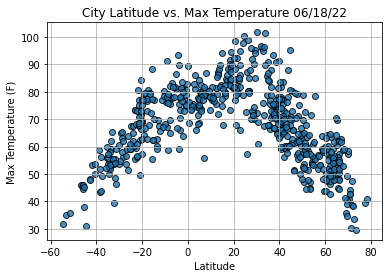

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

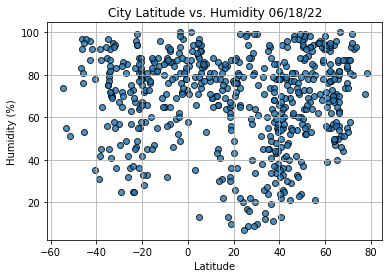

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

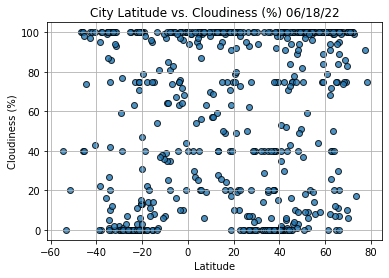

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

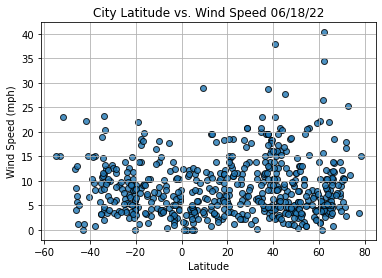

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Vardo,NO,2022-06-18 19:13:21,70.3705,31.1107,40.98,87,100,5.75
4,Severo-Kurilsk,RU,2022-06-18 19:08:58,50.6789,156.1250,46.92,97,100,2.42
8,Road Town,VG,2022-06-18 19:09:29,18.4167,-64.6167,87.84,62,40,6.91
9,Lokosovo,RU,2022-06-18 19:13:24,61.1333,74.8167,56.75,67,100,4.88
11,Yellowknife,CA,2022-06-18 19:09:45,62.4560,-114.3525,63.37,55,72,4.61


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

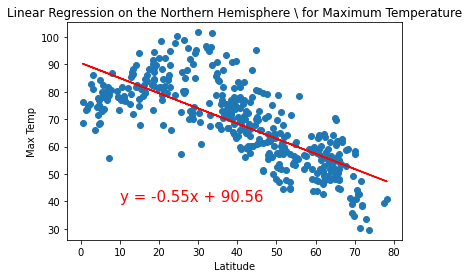

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

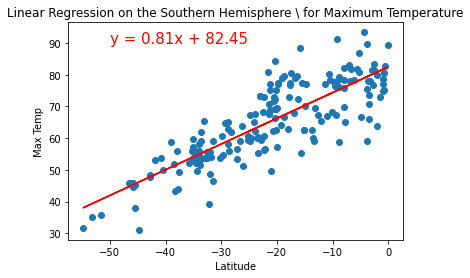

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

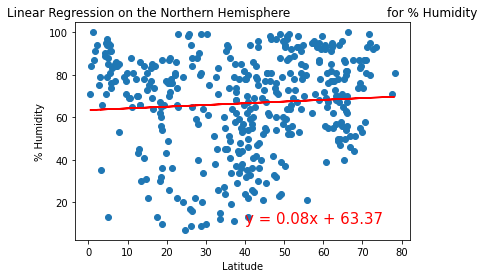

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

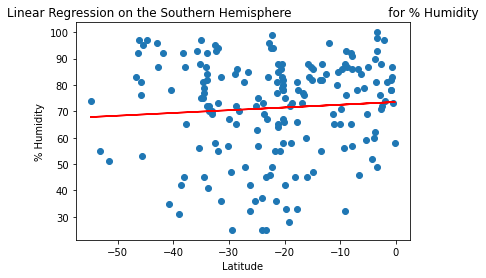

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

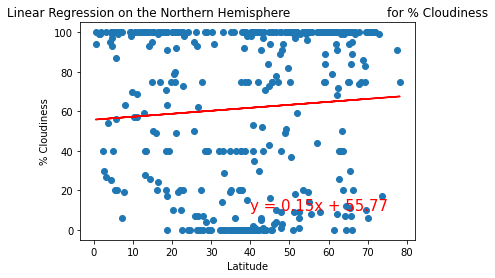

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

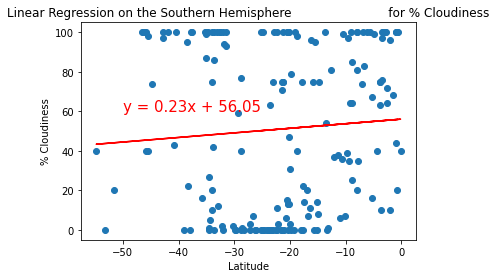

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

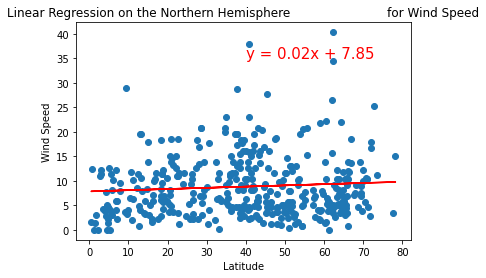

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

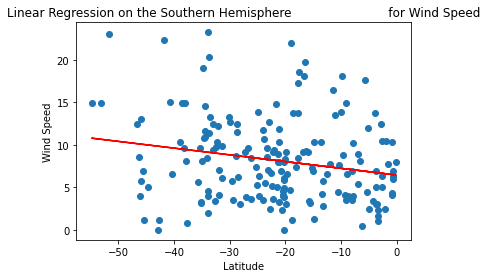

In [34]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))